## 13th & 14th oct 2023

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a DataFrame(importong data)
data=pd.read_csv(r"Advertising.csv",index_col=0,header=0)


In [3]:

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
#checking missing values 
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

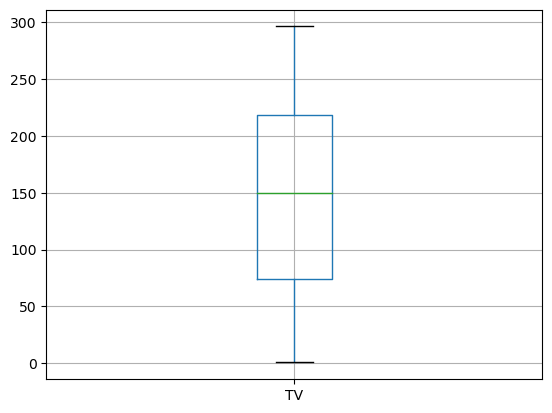

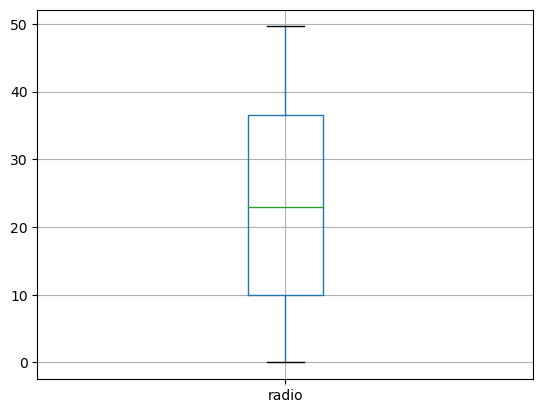

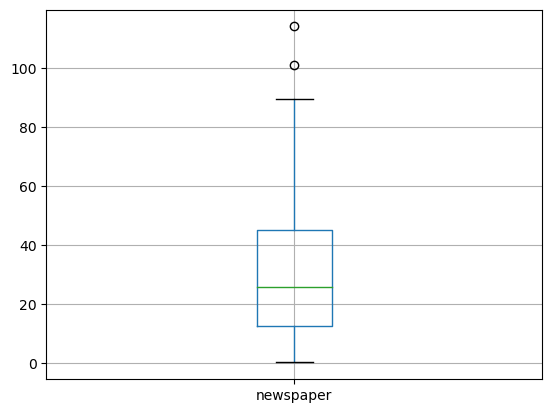

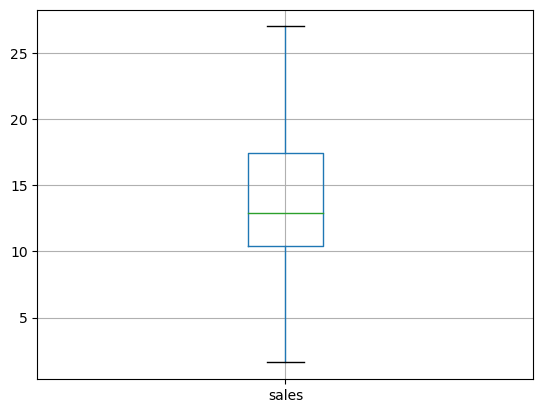

In [6]:
#Assumption 1: There should be no outliers in th data 
#check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

# we can elimanate the newspaper record which is outliers. 
#in this case we are not eliminating,considered they are extream outliers 

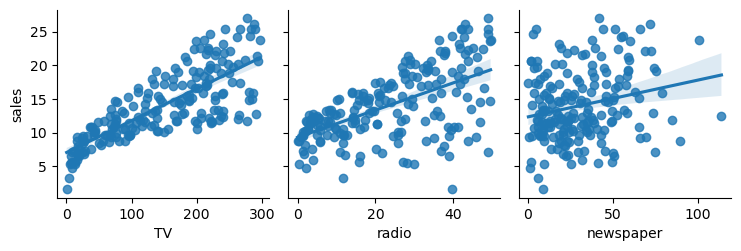

In [7]:
#Assumption 2: Assumption of linearity : every independent variable 
#should have a linear realtionship with the dependent variable

sns.pairplot(data,x_vars=["TV","radio","newspaper"],
            y_vars=["sales"],kind="reg")
plt.show()

#Tv and radio shows positive linear relationship with sales but newspaper does not shows positive relationship with the sales 
#so we can eliminate.
#we can elminate a variable which do not show linear relationship.

In [8]:
#spliting variable 
#indexing 
#create X and Y 
X=data.loc[:,["TV","radio","newspaper"]]
Y=data.loc[:,"sales"]
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [9]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


C:\Users\joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


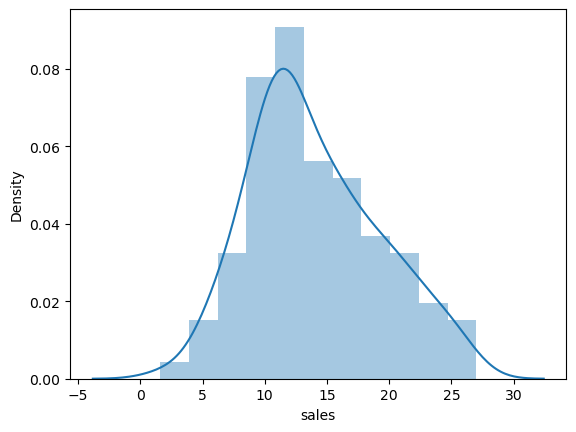

In [10]:
#Assumption of Normality: The dependent variable should follow on appoximate normal distribution 
sns.distplot(Y)
plt.show()

In [11]:
""""
# log transformation
import numpy as np 
Y_log = np.log(Y)
# if variable not follow normal distribution

SyntaxError: EOF while scanning triple-quoted string literal (1278076051.py, line 5)

In [ ]:
#do not unnecessary log tranform to make your data skewed 
#sns.distplot(Y_log,hist=True)
#plt.show()

In [ ]:
X.hist(bins=20)
plt.show()
#newspaper is right skewed variable 

In [ ]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

#if we log 0 we get -infinity as the value which will throw an error in later state while buliding a model.
#in this case we can use log1p which will help us to add one and then take log to avoid -infinity

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


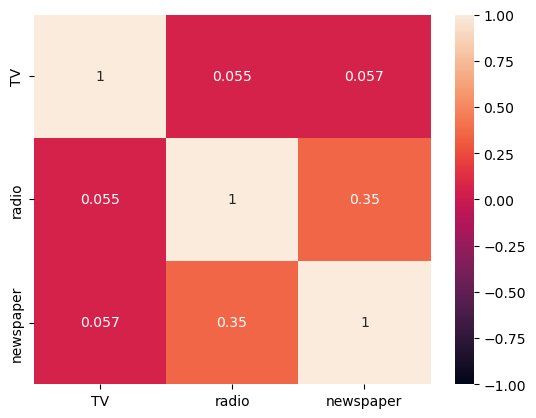

In [12]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,TV,2.49
1,radio,3.29
2,newspaper,3.06


In [14]:
#if VIF value is high 
#X.drop("news",axis=1,inplace=true)
#rerun the VIF code
#eliminate only variable at time which shows the  highest VIF value.
#as the problematic variable get eliminated the other variables will start having lower VIF values.
#accpetable VIF values <5/<10

In [15]:
from sklearn.model_selection import train_test_split

#Split the data into testand train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=10 )

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [17]:
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

Percent of train data 80.0


In [18]:
#>1000-->test_size=0.3
#<1000-->test_size=0.2

In [19]:
#model bulding 
from sklearn.linear_model import LinearRegression 
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficent 
print(lm.intercept_)
print(lm.coef_)

3.2540971144188866
[ 0.0437726   0.19343299 -0.00222879]


In [20]:
# pair the feature name with the coefficent 
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04377260306304601), ('radio', 0.19343298611600768), ('newspaper', -0.002228792805605395)]


In [21]:
X1=100
X2=100
X3=np.log1p(100)
Y_pred=3.3532913858151474+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800658


In [22]:
#predict using the model 
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]


In [23]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,9.3,18.4,18.162530
1,8.7,48.9,75.0,7.2,12.926632
2,218.4,27.7,53.4,18.0,18.053110
3,283.6,42.0,66.2,25.5,23.644647
4,216.4,41.7,39.6,22.6,20.704384
5,147.3,23.9,19.1,14.6,14.282280
6,188.4,18.1,25.6,14.9,14.944935
7,198.9,49.4,60.0,23.7,21.382330
8,216.8,43.9,27.2,22.3,21.175082
9,17.2,45.9,69.3,9.3,12.731105


## 21st Oct 2023

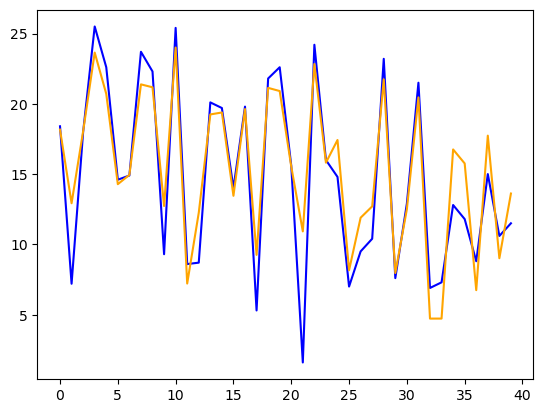

In [24]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

In [25]:
#Evaluation matrics
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2

0.9209087553499528

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8353672324670592
RMSE: 2.5885298446278107
Adj R-square: 0.8328473431680856


In [27]:
print(Y_test.min())
print(Y_test.max())
# r-square & adj r-square is closed to each other or closed to 1 that means the model is good.
# RMSE vlaue is also lowest value as we to the compare Y_test so that means model is good. 

1.6
25.5


In [28]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,9.3,18.4,18.162530,0.237470
1,8.7,48.9,75.0,7.2,12.926632,-5.726632
2,218.4,27.7,53.4,18.0,18.053110,-0.053110
3,283.6,42.0,66.2,25.5,23.644647,1.855353
4,216.4,41.7,39.6,22.6,20.704384,1.895616


# Ridge

In [29]:
#Regularization techniques
# Ridge

from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,Y_train)
#print intercept and coefficents
print(rid.intercept_)
print(rid.coef_)

3.25419965047916
[ 0.0437726   0.19342655 -0.00222742]


In [30]:
Y_pred=rid.predict(X_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8353686978689225
RMSE: 2.588518324306081
Adj R-square: 0.8328488309995693


# LASSO

In [ ]:
#LASSO

from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,Y_train)
#print intercept and coefficents
print(las.intercept_)
print(las.coef_)

In [33]:
Y_pred=las.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


# 15th Oct 2023

# OLS Ordinary least Square (Statsmodel)

In [ ]:
# OLS --> OLS(Y_train, X_train)
#ols  --> ols(Y~X1+X2+X3)

In [ ]:
#fit(X_train, Y_train) --> sklearn
#Y~X1+X2+X3, data = df --> statsmodel

In [35]:
new_df = pd.DataFrame()
new_df = X_train.copy()


new_df["sales"] = Y_train.copy()
new_df.shape

(160, 4)

In [36]:
import statsmodels.formula.api as sm

#creare a fitted model with all three features
lm_model = sm.ols(formula="sales~ TV + radio + newspaper", data=new_df).fit()

#printing the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]

"""

Intercept    3.254097
TV           0.043773
radio        0.193433
newspaper   -0.002229
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.09e-85
Time:                        12:14:19   Log-Likelihood:                -276.62
No. Observations:                 160   AIC:                             561.2
Df Residuals:                     156   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3522471725965985\n[ 0.04374234  0.19302603 -0.04853131]\n\n'

Assumtion 5: There should be no auto-correlation in the data

Auto-correlation means relationship between same variable that is Y releated with Y It is found in Time Series Data

Y-current related with Y-Previous eg. Stock price today depends on stock price yesterday.

Durbin-watson:

Durbin-watson Ranges : 0 to 4

If the Durbin-watson value is close to 2 --> no auto correlation
If the Durbin-watson value is close to 0 --> +ve auto correlation
If the Durbin-watson value is close to 4 --> -ve auto correlation

In [37]:
Y_pred_new = lm_model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)



"""
MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292

"""

R-squared: 0.8353672324670594
RMSE: 2.5885298446278098
Adj R-square: 0.8328473431680857


'\nMODEL VALUES\n\nR-squared: 0.8348010719035319\nRMSE: 2.592976911093061\nAdj R-square: 0.8322725168816472\n\n\nRIDGE VALUES:\n\nR-squared: 0.8348082644975935\nRMSE: 2.5929204626839977\nAdj R-square: 0.8322798195664342\n\nLASSO:\n\nR-squared: 0.8360506658527163\nRMSE: 2.5831514271094234\nAdj R-square: 0.8335412372688292\n\n'

In [39]:
import statsmodels.formula.api as sm

#creare a fitted model with all three features
lm_model = sm.ols(formula="sales~ TV + radio", data=new_df).fit()

#printing the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.47e-87
Time:                        12:15:47   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [40]:
Y_pred_new = lm_model.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 

print("With Eliminating the NewsPaper")
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


print("""
MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


Without Eliminating the NewsPaper:

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529
""")

With Eliminating the NewsPaper
R-squared: 0.8354496662944217
RMSE: 2.58788170773781
Adj R-square: 0.8329310387377037

MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


Without Eliminating the NewsPaper:

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529



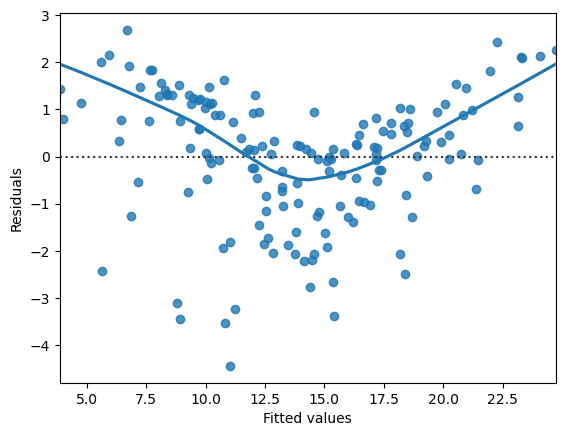

In [41]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()



# The line should be a random line and should not follow a wave like pattern

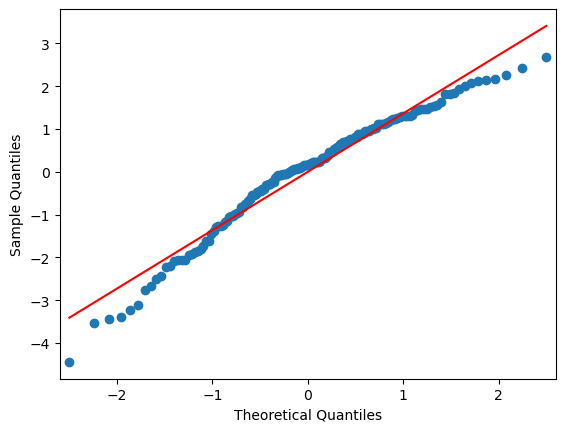

In [42]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot (Quantile-Quantile plot)
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')



## The Error points should follow the red diagonal line
#  The normal QQ plot is use to compare a given set of values with standard normal distributed data (Theoretical Quantiles)

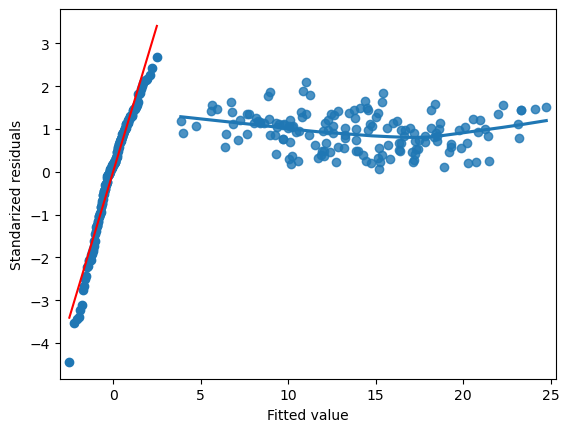

In [43]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()




## V-shape = Heteroskedasticity
## Approx tilted line = Homoskedasticity

## Assumption states that it should follow a Homoskedasticity, not the Hetroskedasticity.
## The Line should be an approximate horizontal line and should not have a steep angle or a V-shape line.


In [44]:
?sns.regplot